---

# Feature Engineering

This step is needed before attempting any model training, in order to get rid of categorical columns.

As we saw in the data analysis the best predictors are likely to be 
   - cats
   - smoking
   - type (basement, house, roo for rent)
   - beds
   - bath
   - lease term (short term, long term)
   - city (Camrose, West Vancouver, Vancouver, Rocky View)

Here are the steps that will be perform during the feature engineering

1. Removing unnecessary column

    - availability_date

2. Encode categorical columns

   - lease_term
   - type
   - furnishing
   - smoking
   - province

3. Investigate the correlation of Price vs each columns

   * Compute correlation of price vs each columns

   * Analyse correlation and find best predictors (highest correlation in regard to price)

4. Save engineered dataset

   - Entire engineered dataset '../Data/canada_rent_featEng.csv'
   - Engineered dataset for price <= 5 000$ '../Data/canada_rent_featEng_max5k.csv'

5. Use SelectKBest to find the best predictors.

6. Repeats the steps for subset of the province of Alberta

---

### Importing necessary library

In [1]:
import pandas as pd
import numpy as np

import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest, chi2


### Reading the cleaned data file

In [2]:
rent_df_o = pd.read_csv('../Data/canada_rent_clean.csv')

rent_df = rent_df_o.copy(deep=True)
rent_df.head(5)

city province   latitude   longitude  lease_term        type  price  \
0  Airdrie  Alberta  51.271725 -114.020135  Negotiable   Apartment   2390   
1  Airdrie  Alberta  51.271725 -114.020135  Negotiable   Apartment   3615   
2  Airdrie  Alberta  51.271725 -114.020135  Negotiable   Apartment   4520   
3  Airdrie  Alberta  51.271725 -114.020135  Negotiable   Apartment   1930   
4  Airdrie  Alberta  51.285251 -114.010128   Long Term  Main Floor   1700   

   beds  baths  sq_feet   furnishing availability_date      smoking  cats  \
0     0    1.0      361  Unfurnished        2025-02-24  Non-Smoking     1   
1     1    1.0      525  Unfurnished        2025-02-24  Non-Smoking     1   
2     2    1.0      810  Unfurnished        2025-02-24  Non-Smoking     1   
3     0    1.0      265  Unfurnished        2025-02-24  Non-Smoking     1   
4     2    1.0      997  Unfurnished        2025-02-24  Non-Smoking     0   

   dogs  
0     1  
1     1  
2     1  
3     1  
4     0

### Making sure the the data set is clean


In [3]:
rent_df[rent_df.isna()].sum()

city                   0
province               0
latitude             0.0
longitude            0.0
lease_term             0
type                   0
price                0.0
beds                 0.0
baths                0.0
sq_feet              0.0
furnishing             0
availability_date      0
smoking                0
cats                 0.0
dogs                 0.0
dtype: object

### Removing unecessary columns

I will be removing the availability_date column, since I don't believe that this can affect the price.

In [4]:
rent_df = rent_df.drop(columns = ['availability_date'])

rent_df.head(5)

city province   latitude   longitude  lease_term        type  price  \
0  Airdrie  Alberta  51.271725 -114.020135  Negotiable   Apartment   2390   
1  Airdrie  Alberta  51.271725 -114.020135  Negotiable   Apartment   3615   
2  Airdrie  Alberta  51.271725 -114.020135  Negotiable   Apartment   4520   
3  Airdrie  Alberta  51.271725 -114.020135  Negotiable   Apartment   1930   
4  Airdrie  Alberta  51.285251 -114.010128   Long Term  Main Floor   1700   

   beds  baths  sq_feet   furnishing      smoking  cats  dogs  
0     0    1.0      361  Unfurnished  Non-Smoking     1     1  
1     1    1.0      525  Unfurnished  Non-Smoking     1     1  
2     2    1.0      810  Unfurnished  Non-Smoking     1     1  
3     0    1.0      265  Unfurnished  Non-Smoking     1     1  
4     2    1.0      997  Unfurnished  Non-Smoking     0     0

### Encoding nominal categorical columns

---
As we have seen previously in the Data_Analysis.ipynb, there are six category columns.
  * lease_term
  * type
  * furnishing
  * smoking
  * province
  * city

In [5]:
# List of columns to encode
cols = ['lease_term', 'type', 'furnishing', 'smoking', 
        'province']

In [6]:
# Create instance of OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output = False) #, handle_unknown="ignore")

# Encode the categorical columns
encoded_cols = encoder.fit_transform(rent_df[cols])

# Put the encoded column into a dataframe
tmp_df = pd.DataFrame(encoded_cols, columns = encoder.get_feature_names_out(cols))

# Removing categorical columns
rent_df = rent_df.drop(columns=cols)

# Join encoded dataframe to the rent_df dataframe
rent_df = rent_df.join(tmp_df)

rent_df.head()

city   latitude   longitude  price  beds  baths  sq_feet  cats  dogs  \
0  Airdrie  51.271725 -114.020135   2390     0    1.0      361     1     1   
1  Airdrie  51.271725 -114.020135   3615     1    1.0      525     1     1   
2  Airdrie  51.271725 -114.020135   4520     2    1.0      810     1     1   
3  Airdrie  51.271725 -114.020135   1930     0    1.0      265     1     1   
4  Airdrie  51.285251 -114.010128   1700     2    1.0      997     0     0   

   lease_term_6 months  ...  furnishing_Unfurnished  smoking_Smoking Allowed  \
0                  0.0  ...                     1.0                      0.0   
1                  0.0  ...                     1.0                      0.0   
2                  0.0  ...                     1.0                      0.0   
3                  0.0  ...                     1.0                      0.0   
4                  0.0  ...                     1.0                      0.0   

   province_British Columbia  province_Manitoba  province_New Brunswick  \
0                        0.0                0.0                     0.0   
1                        0.0                0.0                     0.0   
2                        0.0                0.0                     0.0   
3                        0.0                0.0                     0.0   
4                        0.0                0.0                     0.0   

   province_Newfoundland and Labrador  province_Nova Scotia  province_Ontario  \
0                                 0.0                   0.0               0.0   
1                                 0.0                   0.0               0.0   
2                                 0.0                   0.0               0.0   
3                                 0.0                   0.0               0.0   
4                                 0.0                   0.0               0.0   

   province_Quebec  province_Saskatchewan  
0              0.0                    0.0  
1              0.0                    0.0  
2              0.0                    0.0  
3              0.0                    0.0  
4              0.0                    0.0  

[5 rows x 33 columns]

In [7]:
# List of columns to encode
cols = ['city']

In [8]:
# Create instance of OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output = False) #, handle_unknown="ignore")

# Encode the categorical columns
encoded_cols = encoder.fit_transform(rent_df[cols])

# Put the encoded column into a dataframe
city_df = pd.DataFrame(encoded_cols, columns = encoder.get_feature_names_out(cols))


In [9]:
# Looking at city with the most occurence
city_df.sum().sort_values(ascending=False)[0:20]

city_Calgary          8030.0
city_Toronto          2651.0
city_Edmonton         2466.0
city_Montréal         1584.0
city_Ottawa           1141.0
city_Winnipeg          745.0
city_London            312.0
city_Saskatoon         281.0
city_Kingston          219.0
city_Halifax           202.0
city_Vancouver         193.0
city_Mississauga       190.0
city_Victoria          170.0
city_Regina            168.0
city_Hamilton          153.0
city_Laval             137.0
city_Kitchener         137.0
city_Pointe-Claire     123.0
city_Welland           112.0
city_Brampton          111.0
dtype: float64

In [10]:
# Keeping most expensive cities found during the data analysis and keep the capitals
city_list = ['city_Calgary', 
             'city_Toronto',
             'city_Edmonton',
             'city_Montréal',
             'city_Ottawa',
             'city_Winnipeg',
             'city_Halifax',
             'city_Vancouver',
             'city_Victoria',
             'city_Regina',
             'city_Canmore',
             'city_West Vancouver',
             'city_Rocky View'
            ]

city_df = city_df[city_list]

In [11]:
# Removing categorical columns
rent_df = rent_df.drop(columns=cols)

# Join encoded dataframe to the rent_df dataframe
rent_df = rent_df.join(city_df)

rent_df.head()

latitude   longitude  price  beds  baths  sq_feet  cats  dogs  \
0  51.271725 -114.020135   2390     0    1.0      361     1     1   
1  51.271725 -114.020135   3615     1    1.0      525     1     1   
2  51.271725 -114.020135   4520     2    1.0      810     1     1   
3  51.271725 -114.020135   1930     0    1.0      265     1     1   
4  51.285251 -114.010128   1700     2    1.0      997     0     0   

   lease_term_6 months  lease_term_Long Term  ...  city_Montréal  city_Ottawa  \
0                  0.0                   0.0  ...            0.0          0.0   
1                  0.0                   0.0  ...            0.0          0.0   
2                  0.0                   0.0  ...            0.0          0.0   
3                  0.0                   0.0  ...            0.0          0.0   
4                  0.0                   1.0  ...            0.0          0.0   

   city_Winnipeg  city_Halifax  city_Vancouver  city_Victoria  city_Regina  \
0            0.0           0.0             0.0            0.0          0.0   
1            0.0           0.0             0.0            0.0          0.0   
2            0.0           0.0             0.0            0.0          0.0   
3            0.0           0.0             0.0            0.0          0.0   
4            0.0           0.0             0.0            0.0          0.0   

   city_Canmore  city_West Vancouver  city_Rocky View  
0           0.0                  0.0              0.0  
1           0.0                  0.0              0.0  
2           0.0                  0.0              0.0  
3           0.0                  0.0              0.0  
4           0.0                  0.0              0.0  

[5 rows x 45 columns]

### Investigating the correlation

---
**Low correlation (red & green)**

**High correlation (blue & purple)**

**Medium correlation (blue & purple)**


Conclusion : 
- Latitude and Longitude are highly co-correlated.
- Dogs and cats are highly co-correlated
- Lease term negociable and long term are highly co-correlated


- Beds and Baths are moderately co-correlated

There is no independent feature that is a unremarkably well correlated to price.
Beds and baths are moderately correlated to price.
The next features that are better correlayed to price but low correlation (not near 0) are : type_house, latitude, longitude, type_basement, sq_feet


In [12]:
# Compute correlation
corr = rent_df.select_dtypes(include=[float, int, bool]).corr()

In [13]:
# Convert array to dataframe for visualisation purposes
pd.DataFrame(corr[corr['price']>0.001]['price']).sort_values(by='price', ascending=False)[0:20]

price
price                      1.000000
baths                      0.485465
beds                       0.410193
type_House                 0.289548
city_Toronto               0.275109
province_Ontario           0.203836
longitude                  0.137468
sq_feet                    0.108228
dogs                       0.107975
city_Vancouver             0.096969
lease_term_Short Term      0.093831
province_British Columbia  0.084660
city_West Vancouver        0.065102
cats                       0.064032
city_Canmore               0.048321
province_Nova Scotia       0.041914
city_Halifax               0.036586
type_Duplex                0.031405
type_Condo Unit            0.026700
city_Victoria              0.023352

In [14]:
# Convert array to dataframe for visualisation purposes
pd.DataFrame(corr[corr['price']<0.001]['price']).sort_values(by='price')[0:20]

price
latitude                           -0.240375
type_Room For Rent                 -0.239397
city_Edmonton                      -0.192575
type_Basement                      -0.183905
province_Saskatchewan              -0.141399
province_Manitoba                  -0.089469
city_Winnipeg                      -0.083073
city_Regina                        -0.069271
smoking_Smoking Allowed            -0.037558
lease_term_Negotiable              -0.029774
lease_term_Long Term               -0.023510
province_Newfoundland and Labrador -0.022230
province_Quebec                    -0.015368
furnishing_Unfurnished             -0.010910
province_New Brunswick             -0.010014
city_Montréal                      -0.008660
type_Loft                          -0.008496
furnishing_Negotiable              -0.002716

In [15]:
# Convert array to dataframe for visualisation purposes
pd.DataFrame(abs(corr[corr['price']>0.001]['price'])).sort_values(by='price', ascending=False)[0:30]

price
price                      1.000000
baths                      0.485465
beds                       0.410193
type_House                 0.289548
city_Toronto               0.275109
province_Ontario           0.203836
longitude                  0.137468
sq_feet                    0.108228
dogs                       0.107975
city_Vancouver             0.096969
lease_term_Short Term      0.093831
province_British Columbia  0.084660
city_West Vancouver        0.065102
cats                       0.064032
city_Canmore               0.048321
province_Nova Scotia       0.041914
city_Halifax               0.036586
type_Duplex                0.031405
type_Condo Unit            0.026700
city_Victoria              0.023352
lease_term_months          0.022674
city_Ottawa                0.015795
city_Calgary               0.010694
city_Rocky View            0.009683
lease_term_6 months        0.007354
type_Mobile                0.004940
type_Main Floor            0.004002

In [16]:
pd.DataFrame(abs(corr['price'])).sort_values(by='price', ascending=False)[0:31].index


Index(['price', 'baths', 'beds', 'type_House', 'city_Toronto', 'latitude',
       'type_Room For Rent', 'province_Ontario', 'city_Edmonton',
       'type_Basement', 'province_Saskatchewan', 'longitude', 'sq_feet',
       'dogs', 'city_Vancouver', 'lease_term_Short Term', 'province_Manitoba',
       'province_British Columbia', 'city_Winnipeg', 'city_Regina',
       'city_West Vancouver', 'cats', 'city_Canmore', 'province_Nova Scotia',
       'smoking_Smoking Allowed', 'city_Halifax', 'type_Duplex',
       'lease_term_Negotiable', 'type_Condo Unit', 'lease_term_Long Term',
       'city_Victoria'],
      dtype='object')

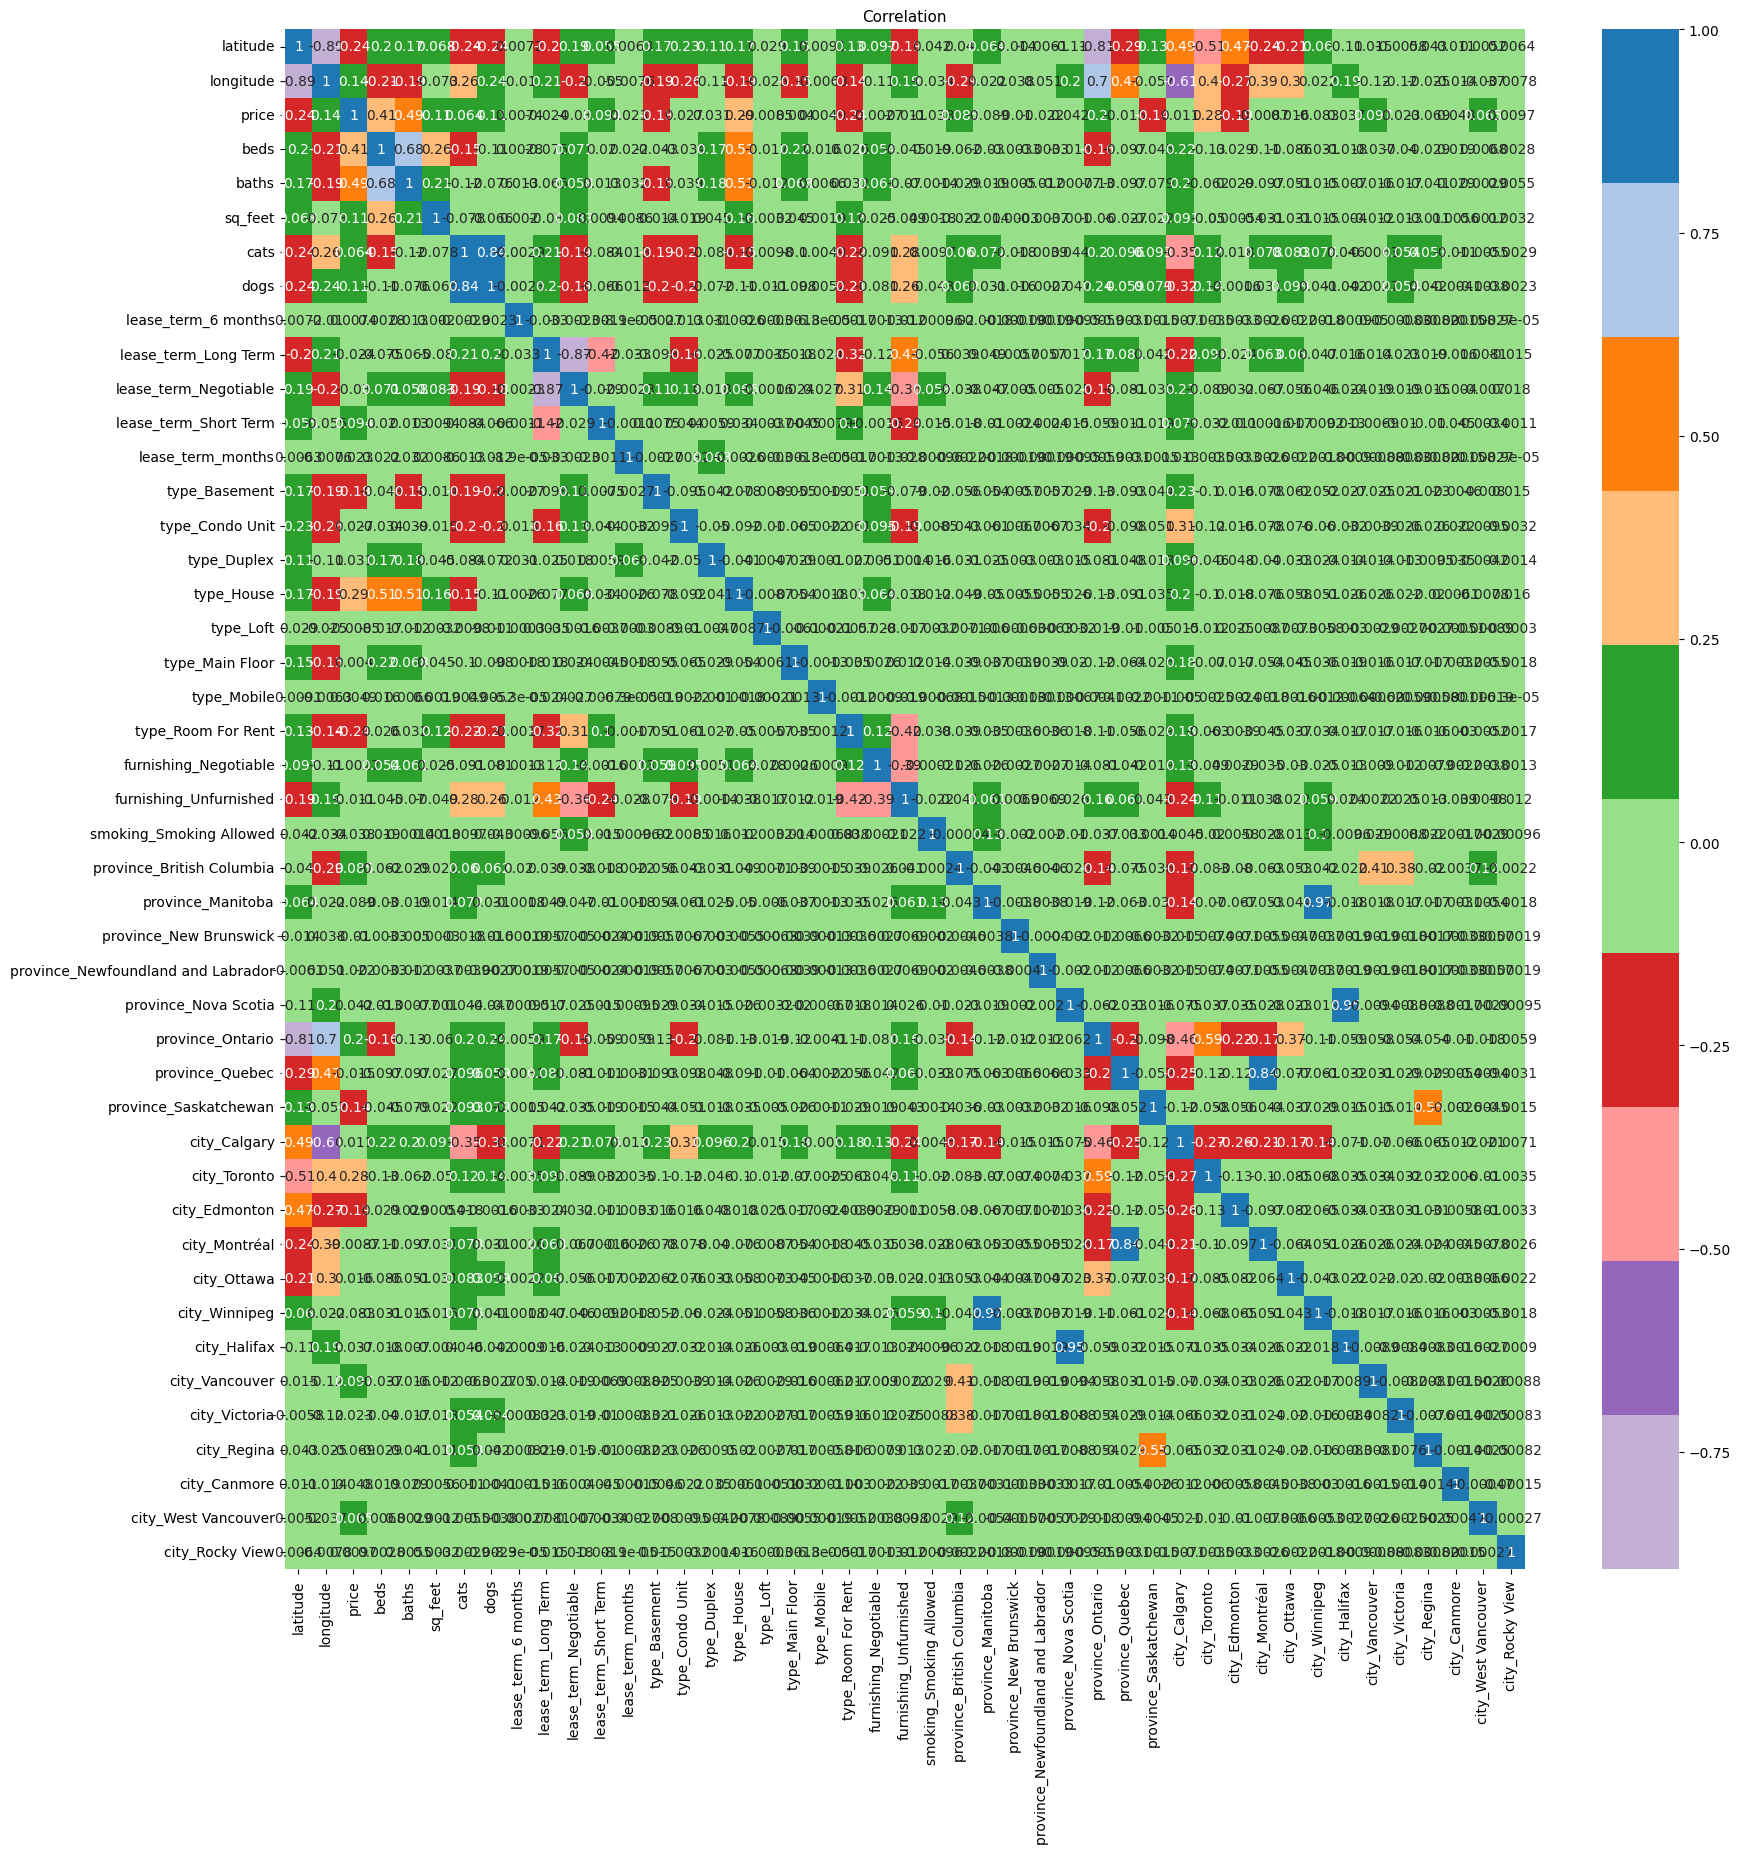

In [17]:
# Heatmap

# Create the figure and adjust its size
plt.figure(figsize = (20, 20))

# I want to use a discrete color palette
# to identify easily values close to 1 and 0
palette = sns.color_palette("tab20",10)
palette.reverse()

# Create the box plot
ax = sns.heatmap(data=corr, annot=True, cmap=palette) 

# Set the title
ax.set_title('Correlation', fontsize = 11)

# Saving the plot t be able to zoom in
plt.savefig('../Graph/Correlation_heatmap.png')

# Show plot
plt.show()

### Converting longitude to positive

In [18]:
# Need to turn longitude to positive to used SelectKBest
# We are only considering Canada. So, all longitude are negative.
# There is no positive values on our dataset.
rent_df['longitude'] = abs(rent_df['longitude'])

### Reset index

In [19]:
rent_df = rent_df.reset_index(drop=True)

### Save the Engineered Features dataset

In [20]:
rent_df.to_csv(f'../Data/canada_rent_featEng.csv', index=False)
rent_df[rent_df['price'] <= 5000].to_csv('../Data/canada_rent_featEng_max5k.csv')

---
### Find best predictors with SelecKBest

---

**Create split train dataset**

In [21]:
# Separate independent variable from dependent variable
X = rent_df.drop(['price'], axis=1)
y = rent_df['price']

# Split data into training/testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


### Find the best independent features to predict with

In [22]:
# Amount of column in dataframe
len(X.columns)

44

In [23]:
# Initialize SelectKBest with chi2, choose top 5 features
selector = SelectKBest(score_func=chi2, k=5)

# Fit and transform training data only
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = selector.get_feature_names_out(X.columns)

# View top 5 features
print('The top 5 best independent features are :', selected_features)

The top 5 best independent features are : ['longitude' 'sq_feet' 'lease_term_6 months' 'type_Room For Rent'
 'city_West Vancouver']


In [24]:
# Initialize SelectKBest with chi2, choose top 10 features
selector = SelectKBest(score_func=chi2, k=10)

# Fit and transform training data only
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = selector.get_feature_names_out(X.columns)

# View top 10 features
print('The top 10 best independent features are :', selected_features)

The top 10 best independent features are : ['longitude' 'sq_feet' 'lease_term_6 months' 'type_House'
 'type_Room For Rent' 'province_Manitoba' 'city_Toronto' 'city_Winnipeg'
 'city_Regina' 'city_West Vancouver']


In [25]:
# Initialize SelectKBest with chi2, choose top 15 features
selector = SelectKBest(score_func=chi2, k=15)

# Fit and transform training data only
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = selector.get_feature_names_out(X.columns)

# View top 15 features
print('The top 15 best independent features are :', selected_features)

The top 15 best independent features are : ['longitude' 'sq_feet' 'lease_term_6 months' 'type_Basement' 'type_House'
 'type_Room For Rent' 'province_Manitoba'
 'province_Newfoundland and Labrador' 'province_Ontario'
 'province_Saskatchewan' 'city_Toronto' 'city_Edmonton' 'city_Winnipeg'
 'city_Regina' 'city_West Vancouver']


In [26]:
# Initialize SelectKBest with chi2, choose top 20 features
selector = SelectKBest(score_func=chi2, k=20)

# Fit and transform training data only
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = selector.get_feature_names_out(X.columns)

# View top 20 features
print('The top 20 best independent features are :', selected_features)

The top 20 best independent features are : ['longitude' 'beds' 'sq_feet' 'lease_term_6 months'
 'lease_term_Short Term' 'type_Basement' 'type_House' 'type_Room For Rent'
 'province_Manitoba' 'province_Newfoundland and Labrador'
 'province_Ontario' 'province_Saskatchewan' 'city_Calgary' 'city_Toronto'
 'city_Edmonton' 'city_Ottawa' 'city_Winnipeg' 'city_Vancouver'
 'city_Regina' 'city_West Vancouver']


In [27]:
# Initialize SelectKBest with chi2, choose top 30 features
selector = SelectKBest(score_func=chi2, k=30)

# Fit and transform training data only
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = selector.get_feature_names_out(X.columns)

# View top 20 features
print('The top 30 best independent features are :', selected_features)

The top 30 best independent features are : ['latitude' 'longitude' 'beds' 'baths' 'sq_feet' 'lease_term_6 months'
 'lease_term_Negotiable' 'lease_term_Short Term' 'type_Basement'
 'type_Condo Unit' 'type_House' 'type_Room For Rent'
 'smoking_Smoking Allowed' 'province_British Columbia' 'province_Manitoba'
 'province_Newfoundland and Labrador' 'province_Nova Scotia'
 'province_Ontario' 'province_Quebec' 'province_Saskatchewan'
 'city_Calgary' 'city_Toronto' 'city_Edmonton' 'city_Montréal'
 'city_Ottawa' 'city_Winnipeg' 'city_Vancouver' 'city_Victoria'
 'city_Regina' 'city_West Vancouver']


## By province

In [28]:
prov = 'Alberta'

In [29]:
prov_df = rent_df_o[rent_df_o['province'] == prov]

In [30]:
prov_df = prov_df.drop(columns = ['availability_date','province'])

In [31]:
prov_df.isna().sum()

city          0
latitude      0
longitude     0
lease_term    0
type          0
price         0
beds          0
baths         0
sq_feet       0
furnishing    0
smoking       0
cats          0
dogs          0
dtype: int64

In [32]:
# Create instance of OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output = False) #, handle_unknown="ignore")

# Encode the categorical columns
encoded_cols = encoder.fit_transform(prov_df[['lease_term', 'type',
                                              'furnishing', 'smoking','city']])

# Put the encoded column into a dataframe
tmp_df = pd.DataFrame(encoded_cols, columns = encoder.get_feature_names_out(['lease_term', 
                                                                             'type',
                                                                             'furnishing',
                                                                             'smoking','city']))


# Removing categorical columns
prov_df = prov_df.drop(columns=['lease_term', 'type',
                                'furnishing', 'smoking','city'])

prov_df = prov_df.reset_index(drop=True)
tmp_df = tmp_df.reset_index(drop=True)


# Join encoded dataframe to the rent_df dataframe
prov_df = prov_df.join(tmp_df)

prov_df['longitude'] = abs(prov_df['longitude'])
prov_df.head()

latitude   longitude  price  beds  baths  sq_feet  cats  dogs  \
0  51.271725  114.020135   2390     0    1.0      361     1     1   
1  51.271725  114.020135   3615     1    1.0      525     1     1   
2  51.271725  114.020135   4520     2    1.0      810     1     1   
3  51.271725  114.020135   1930     0    1.0      265     1     1   
4  51.285251  114.010128   1700     2    1.0      997     0     0   

   lease_term_6 months  lease_term_Long Term  ...  city_St. Albert  \
0                  0.0                   0.0  ...              0.0   
1                  0.0                   0.0  ...              0.0   
2                  0.0                   0.0  ...              0.0   
3                  0.0                   0.0  ...              0.0   
4                  0.0                   1.0  ...              0.0   

   city_Stony Plain  city_Strathmore  city_Sundre  city_Sylvan Lake  \
0               0.0              0.0          0.0               0.0   
1               0.0              0.0          0.0               0.0   
2               0.0              0.0          0.0               0.0   
3               0.0              0.0          0.0               0.0   
4               0.0              0.0          0.0               0.0   

   city_Wainwright  city_Westerose  city_Westlock  city_Wetaskiwin  \
0              0.0             0.0            0.0              0.0   
1              0.0             0.0            0.0              0.0   
2              0.0             0.0            0.0              0.0   
3              0.0             0.0            0.0              0.0   
4              0.0             0.0            0.0              0.0   

   city_Whitecourt  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  

[5 rows x 80 columns]

In [33]:
# Compute correlation
corr = prov_df.select_dtypes(include=[float, int,bool]).corr()

In [34]:
# Convert array to dataframe for visualisation purposes
pd.DataFrame(abs(corr[corr['price']>0.001]['price'])).sort_values(by='price', ascending=False)[0:40]

price
price                  1.000000
baths                  0.561557
beds                   0.480211
type_House             0.435948
city_Calgary           0.226821
longitude              0.155974
sq_feet                0.111905
type_Condo Unit        0.089350
type_Duplex            0.067751
city_Canmore           0.067184
lease_term_Short Term  0.065854
dogs                   0.058626
city_De Winton         0.040930
type_Main Floor        0.039675
lease_term_months      0.031850
furnishing_Negotiable  0.020199
city_Crowsnest Pass    0.017457
city_Rocky View        0.014601
city_Nisku             0.013315
city_Okotoks           0.011069
city_Chestermere       0.010618
type_Mobile            0.007792
city_Cochrane          0.005792
city_Westerose         0.004111
cats                   0.003318
city_Priddis           0.003190
city_Morinville        0.002730
city_Sundre            0.002270

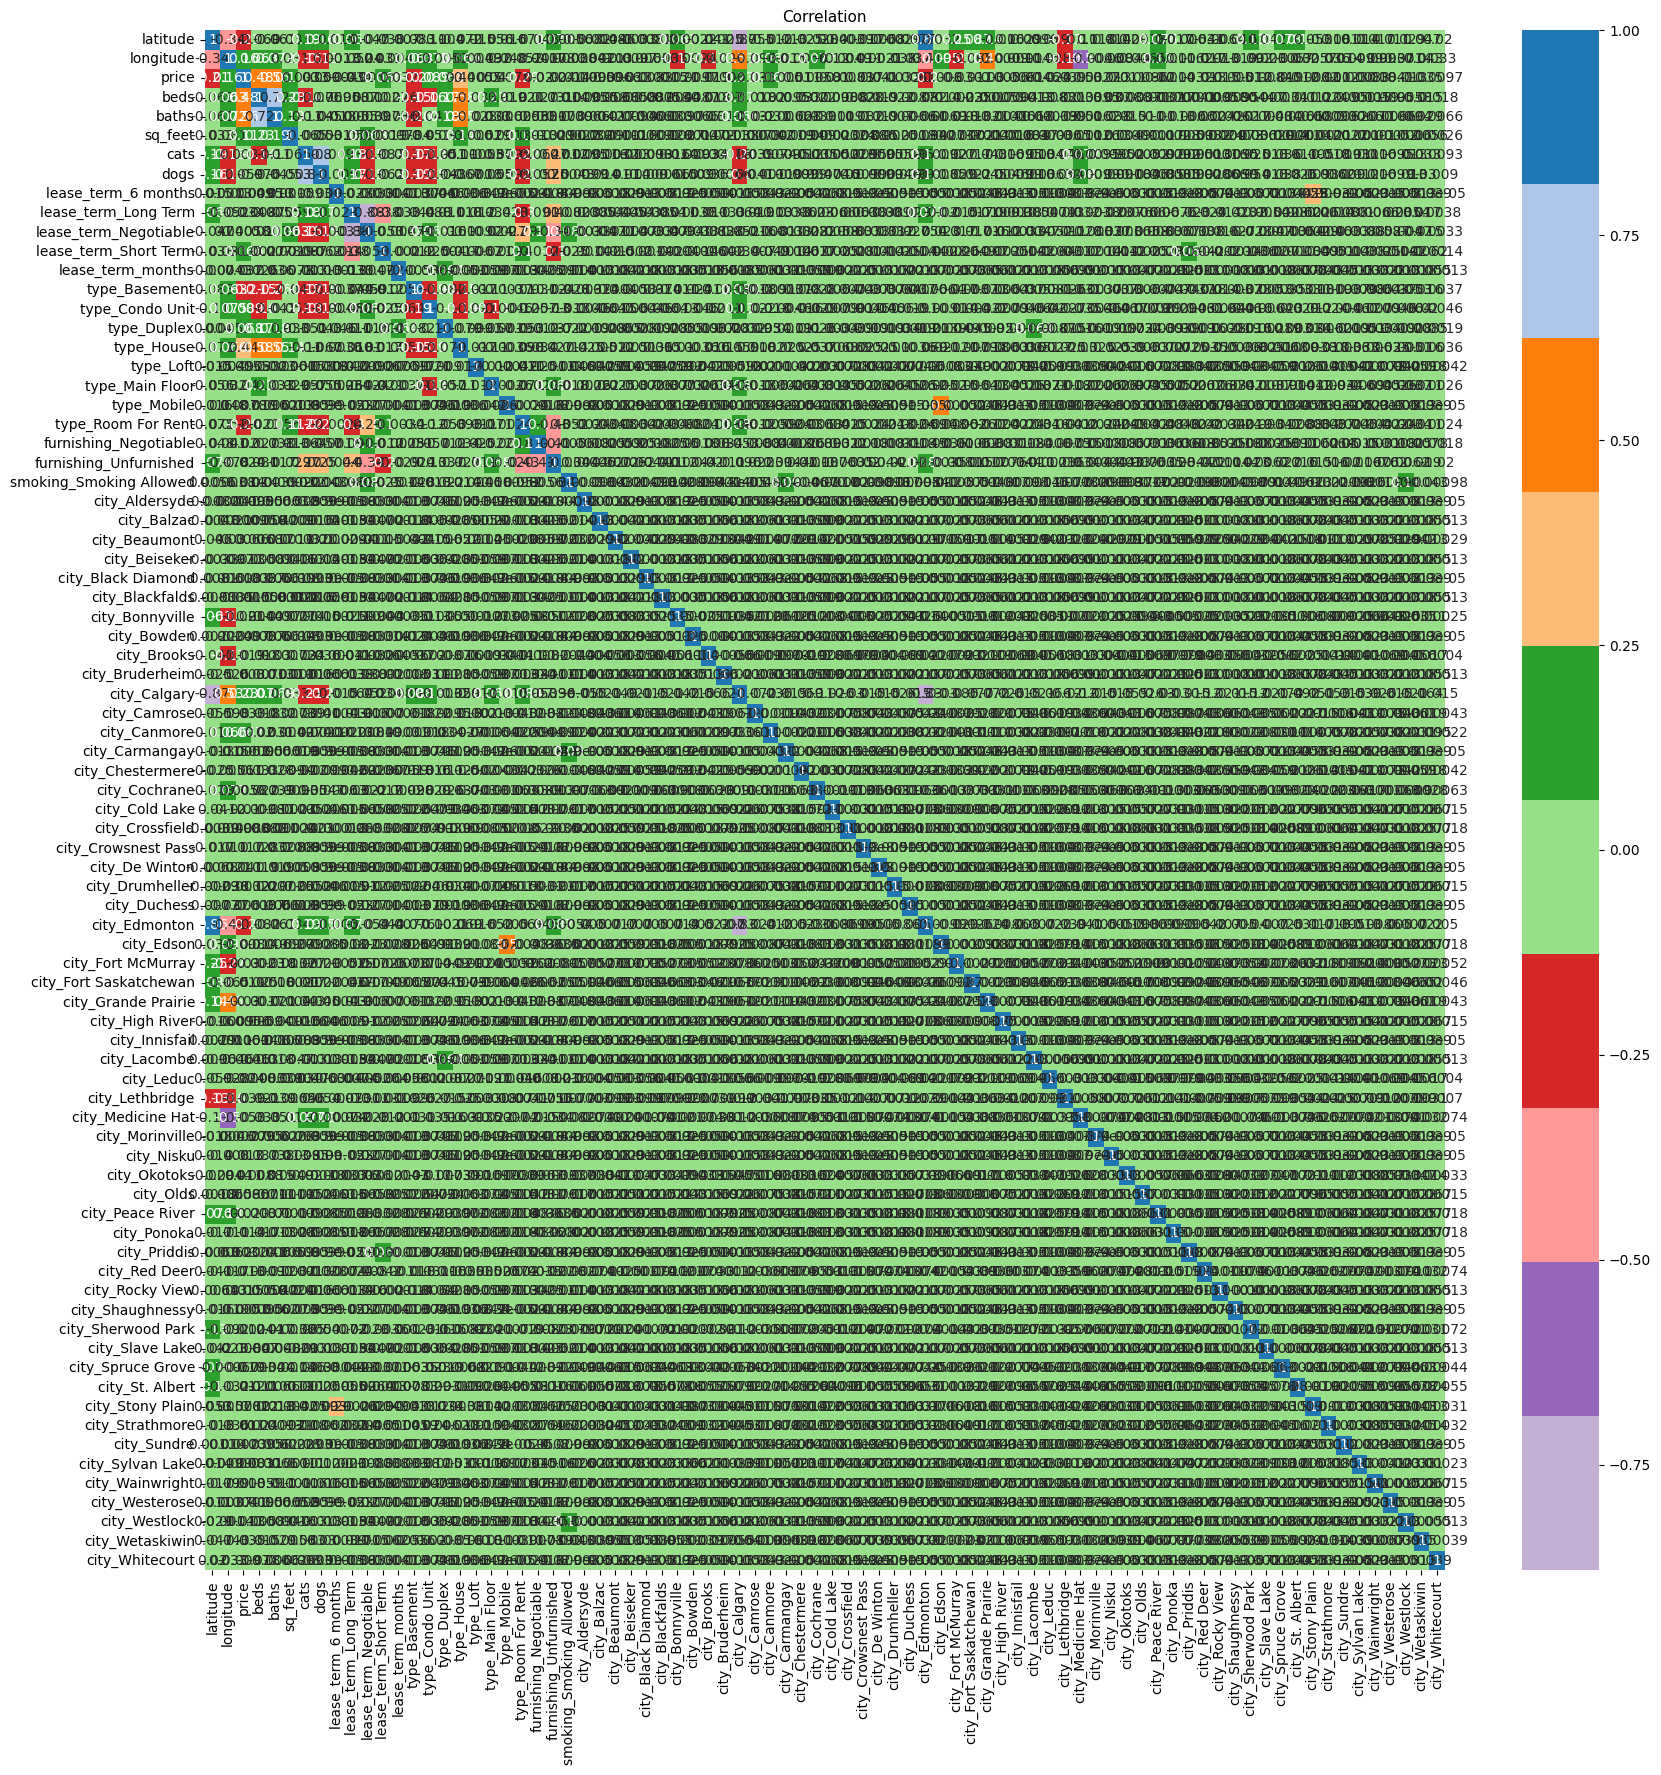

In [35]:
# Heatmap

# Create the figure and adjust its size
plt.figure(figsize = (20, 20))

# I want to use a discrete color palette
# to identify easily values close to 1 and 0
palette = sns.color_palette("tab20",10)
palette.reverse()

# Create the box plot
ax = sns.heatmap(data=corr, annot=True, cmap=palette) 

# Set the title
ax.set_title('Correlation', fontsize = 11)

# Saving the plot t be able to zoom in
plt.savefig('../Graph/Correlation_heatmap.png')

# Show plot
plt.show()

### Save the Engineered Features dataset

In [36]:
prov_df.to_csv(f'../Data/{prov}_rent_featEng.csv', index=False)

In [37]:
# Separate independent variable from dependent variable
X = prov_df.drop(['price'], axis=1)
y = prov_df['price']

# Split data into training/testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


In [38]:
# Initialize SelectKBest with chi2, choose top 5 features
selector = SelectKBest(score_func=chi2, k=5)

# Fit and transform training data only
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = selector.get_feature_names_out(X.columns)

# View top 5 features
print('The top 5 best independent features are :', selected_features)

The top 5 best independent features are : ['sq_feet' 'type_House' 'type_Room For Rent' 'city_Camrose'
 'city_Medicine Hat']


In [39]:
# Initialize SelectKBest with chi2, choose top 10 features
selector = SelectKBest(score_func=chi2, k=10)

# Fit and transform training data only
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = selector.get_feature_names_out(X.columns)

# View top 5 features
print('The top 10 best independent features are :', selected_features)

The top 10 best independent features are : ['sq_feet' 'type_Basement' 'type_House' 'type_Room For Rent'
 'city_Bonnyville' 'city_Camrose' 'city_Grande Prairie' 'city_Lethbridge'
 'city_Medicine Hat' 'city_Sylvan Lake']


In [40]:
# Initialize SelectKBest with chi2, choose top 15 features
selector = SelectKBest(score_func=chi2, k=15)

# Fit and transform training data only
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = selector.get_feature_names_out(X.columns)

# View top 15 features
print('The top 15 best independent features are :', selected_features)

The top 15 best independent features are : ['beds' 'sq_feet' 'type_Basement' 'type_House' 'type_Room For Rent'
 'city_Blackfalds' 'city_Bonnyville' 'city_Camrose' 'city_Edmonton'
 'city_Grande Prairie' 'city_Lethbridge' 'city_Medicine Hat'
 'city_Sherwood Park' 'city_St. Albert' 'city_Sylvan Lake']


In [41]:
# Initialize SelectKBest with chi2, choose top 20 features
selector = SelectKBest(score_func=chi2, k=20)

# Fit and transform training data only
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = selector.get_feature_names_out(X.columns)

# View top 15 features
print('The top 20 best independent features are :', selected_features)

The top 20 best independent features are : ['beds' 'baths' 'sq_feet' 'type_Basement' 'type_Condo Unit' 'type_House'
 'type_Room For Rent' 'city_Blackfalds' 'city_Bonnyville' 'city_Brooks'
 'city_Camrose' 'city_Edmonton' 'city_Grande Prairie' 'city_Lethbridge'
 'city_Medicine Hat' 'city_Red Deer' 'city_Sherwood Park'
 'city_St. Albert' 'city_Sylvan Lake' 'city_Wetaskiwin']


In [42]:
# Initialize SelectKBest with chi2, choose top 30 features
selector = SelectKBest(score_func=chi2, k=30)

# Fit and transform training data only
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = selector.get_feature_names_out(X.columns)

# View top 15 features
print('The top 30 best independent features are :', selected_features)

The top 30 best independent features are : ['beds' 'baths' 'sq_feet' 'cats' 'dogs' 'lease_term_Negotiable'
 'lease_term_Short Term' 'type_Basement' 'type_Condo Unit' 'type_House'
 'type_Loft' 'type_Main Floor' 'type_Room For Rent' 'city_Beaumont'
 'city_Blackfalds' 'city_Bonnyville' 'city_Brooks' 'city_Camrose'
 'city_Cochrane' 'city_Edmonton' 'city_Fort Saskatchewan'
 'city_Grande Prairie' 'city_Lethbridge' 'city_Medicine Hat'
 'city_Red Deer' 'city_Sherwood Park' 'city_Spruce Grove'
 'city_St. Albert' 'city_Sylvan Lake' 'city_Wetaskiwin']
